# Writing SQL Queries based on Business Cases

**Purpose:**
To write queries to solve the business case. 

In [ ]:
Business cases 

**Queries used:**

    self join
    cross join
    substring_index
    Left
    Round
    TIMESTAMPDIFF
    CASE Expression
    CTE
    ABS
    Partition by
    

# Business Case: Tesla Models

**Tesla Models**

Tesla just provided their quarterly sales for their major vehicles.

Determine which Tesla Model has made the most profit.

Include all columns with the "profit" column at the end.

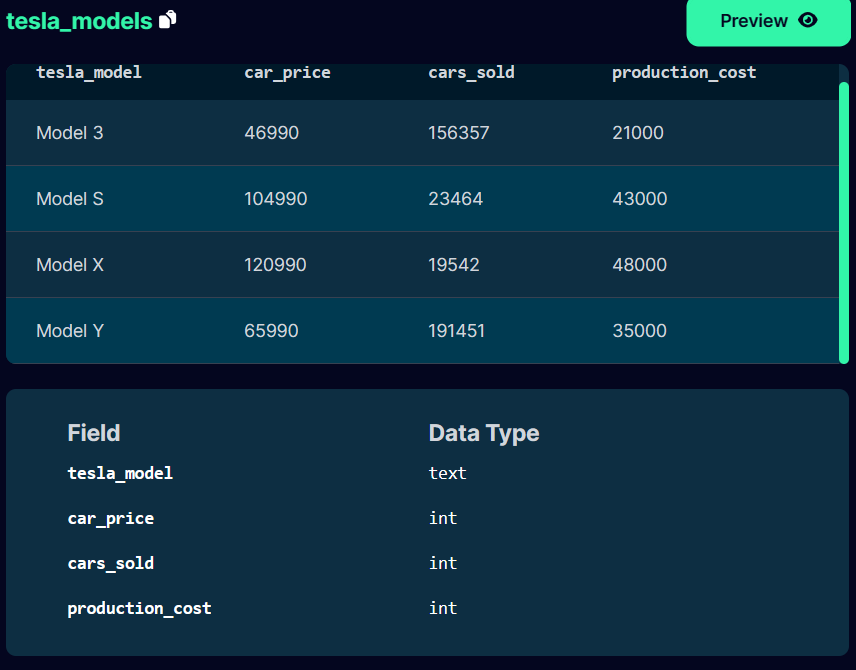

In [ ]:
SELECT *, (car_price - production_cost)* cars_sold AS profit
FROM tesla_models 
ORDER BY profit DESC
LIMIT 1;

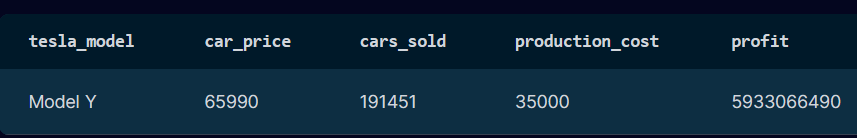

# Business Case: Heart Attack Risk

**Heart Attack Risk**

Dr. Obrien has seen an uptick in heart attacks for his patients over the past few months. He has been noticing some trends across his patients and wants to get ahead of things by reaching out to current patients who are at a high risk of a heart attack.

We need to identify which clients he needs to reach out to and provide that information to Dr. Obrien.

If a patient is over the age of 50, cholesterol level of 240 or over, and weight 200 or greater, then they are at high risk of having a heart attack.

Write a query to retrieve these patients. Include all columns in your output.

As Cholesterol level is the largest indicator, order the output by Cholesterol from Highest to Lowest so he can reach out to them first.

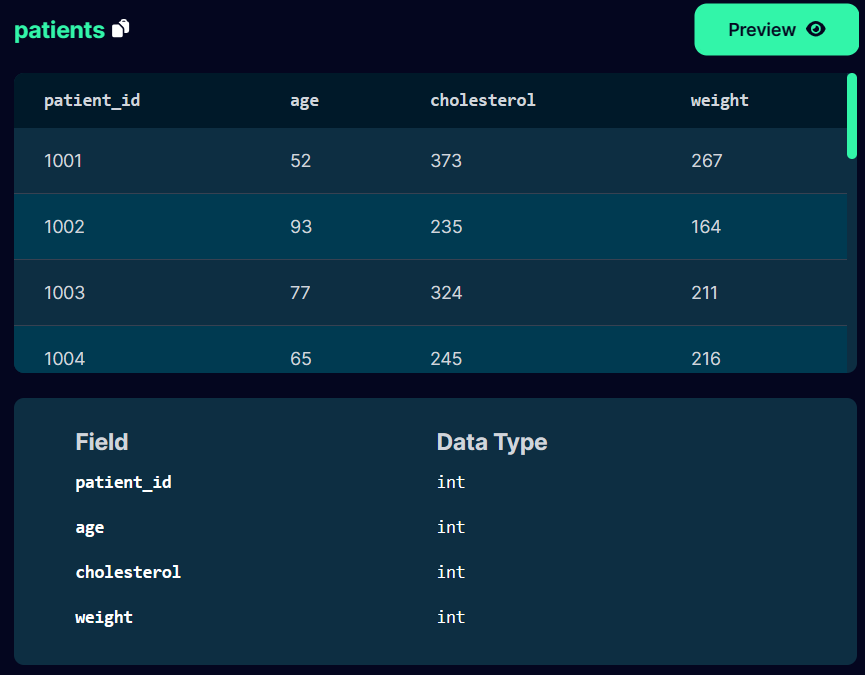

In [ ]:
SELECT * 
FROM patients 
WHERE age >=50 AND cholesterol >= 240 AND weight >= 200
ORDER BY cholesterol DESC
;

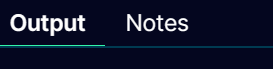
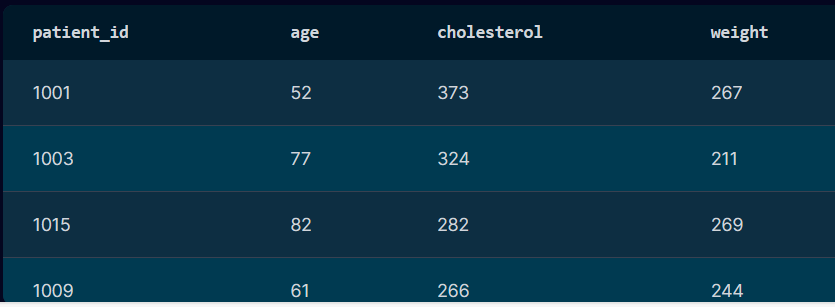


# Business Case: Apply Discount

**Apply Discount**

A Computer store is offering a 25% discount for all new customers over the age of 65 or customers that spend more than $200 on their first purchase.

The owner wants to know how many customers received that discount since they started the promotion.

Write a query to see how many customers received that discount.

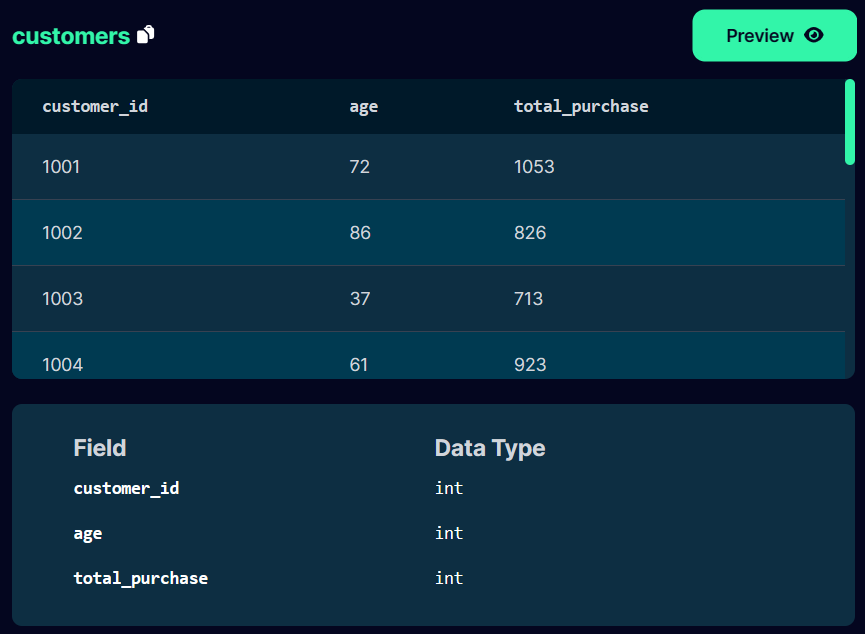

In [ ]:
SELECT count(*) 
FROM customers 
WHERE age >=65 OR total_purchase >= 200
;

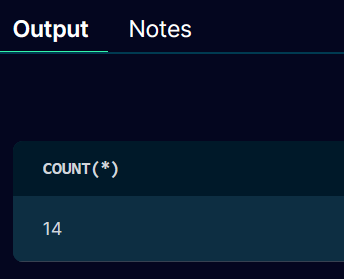

# Business Case: Million Dollar Store

**Million Dollar Store**

Write a query that returns all of the stores whose average yearly revenue is greater than one million dollars.

Output the store ID and average revenue. Round the average to 2 decimal places.

Order by store ID.

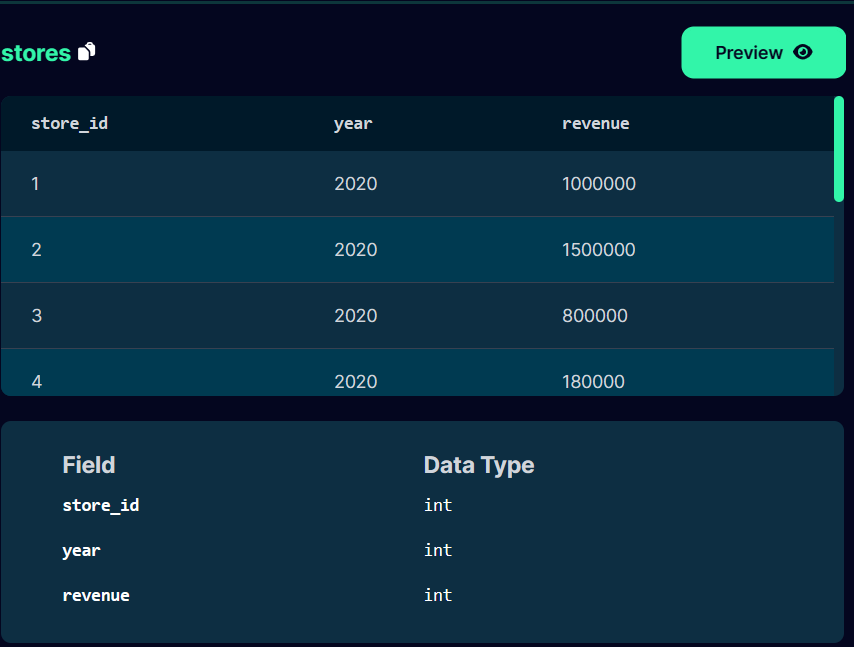

In [ ]:
SELECT store_id, ROUND(AVG(revenue),2) AS avg_revenue
FROM stores 
GROUP BY store_id
HAVING avg_revenue > 1000000
ORDER BY store_id asc;

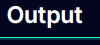
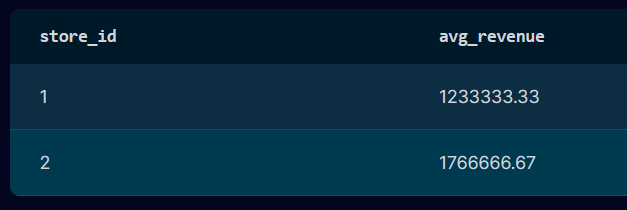

# Business Case: Low Quality YouTube Video

**Low Quality YouTube Video**

Write a query to report the IDs of low quality YouTube videos.

A video is considered low quality if the like percentage of the video (number of likes divided by the total number of votes) is less than 55%.

Return the result table ordered by ID in ascending order.

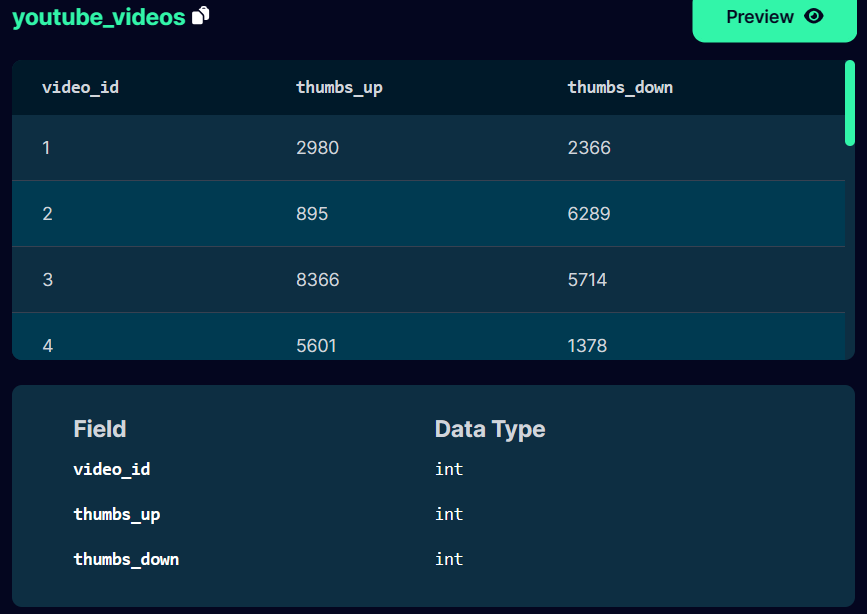

In [ ]:
SELECT video_id
FROM youtube_videos
WHERE (thumbs_up / (thumbs_up + thumbs_down) * 100 ) < 55
ORDER BY video_id ASC
;

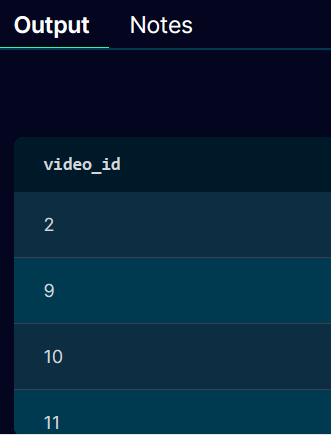

# Business Case: Chocolate

**Chocolate**

I love chocolate and only want delicious baked goods that have chocolate in them!

Write a Query to return bakery items that contain the word "Chocolate".

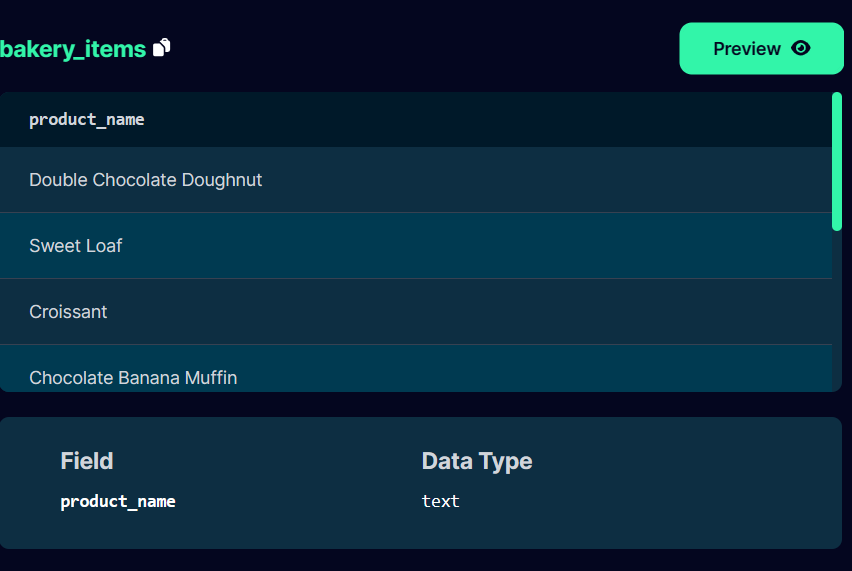

In [ ]:
SELECT * 
FROM bakery_items
WHERE product_name LIKE '%Chocolate%';

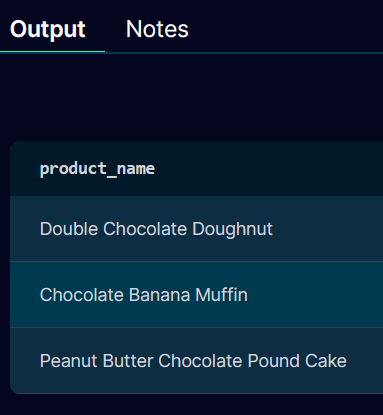

# Business Case: On The Way Out

**On The Way Out**

Herschel's Manufacturing Plant has hit some hard times with the economy and unfortunately they need to let some people go.

They figure the younger employees need their jobs more as they are growing families so they decide to let go of their 3 oldest employees. They have more experience and will be able to land on their feet easier (and they had to pay them more).

Write a query to identify the ids of the three oldest employees.

Order output from oldest to youngest.

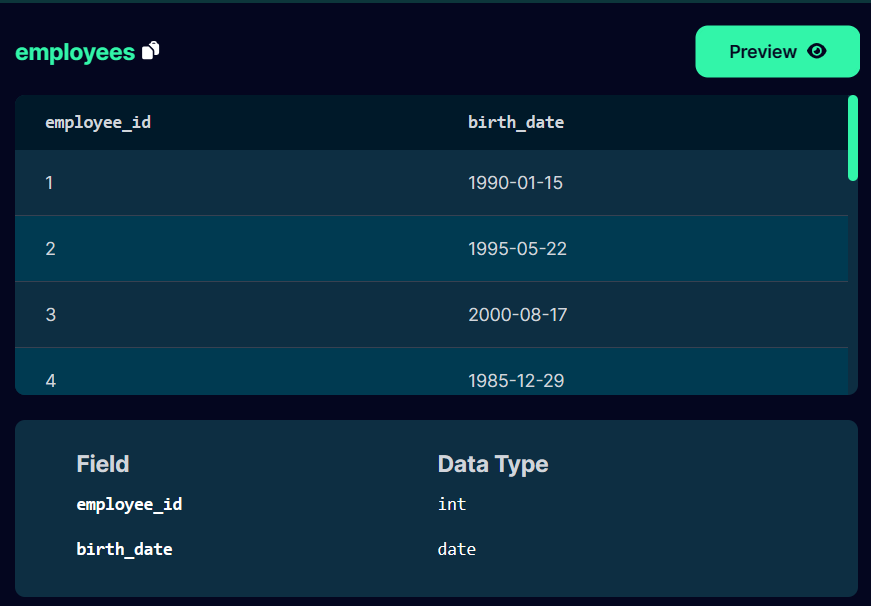

In [ ]:
SELECT employee_id 
FROM employees 
order by birth_date ASC
LIMIT 3;

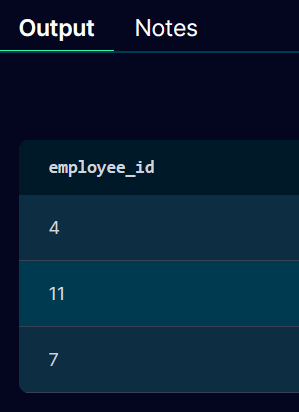

# Business Case: Sandwich Generation

**Sandwich Generation**

Yan is a sandwich enthusiast and is determined to try every combination of sandwich possible. He wants to start with every combination of bread and meats and then move on from there, but he wants to do it in a systematic way.

Below we have 2 tables, bread and meats

Output every possible combination of bread and meats to help Yan in his endeavors.

Order by the bread and then meat alphabetically. This is what Yan prefers.

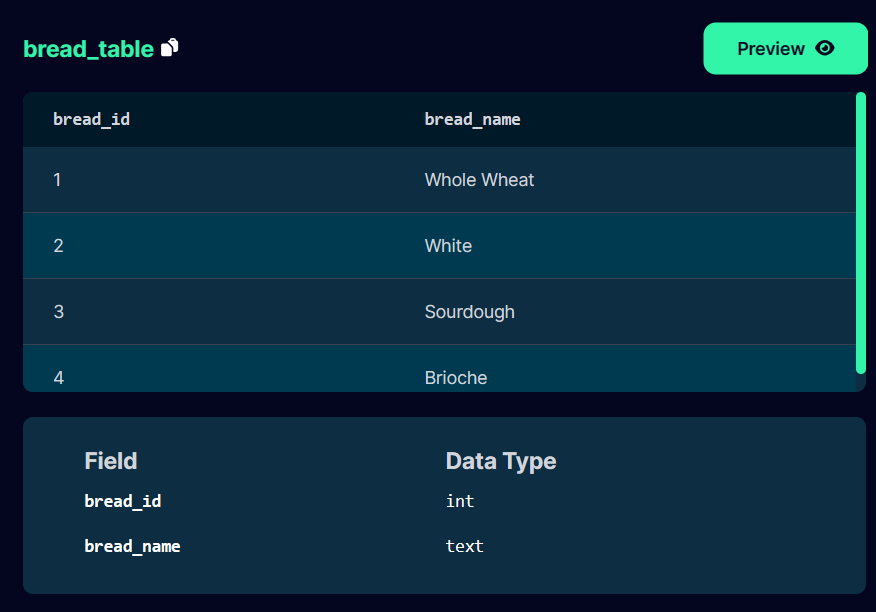

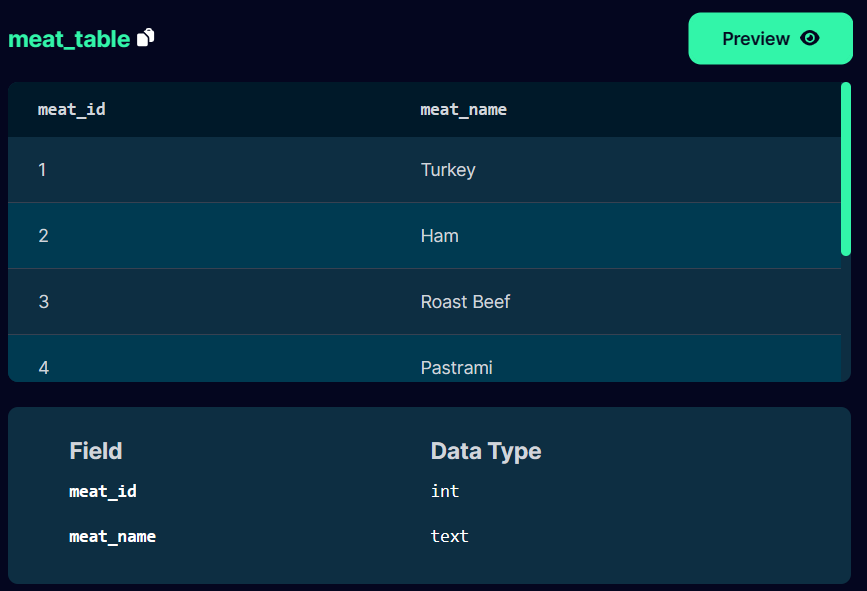

In [ ]:
-- Used  Cross Join to show output of every possible combination of bread and meats
SELECT bread_name, meat_name 
FROM bread_table 
CROSS JOIN meat_table
ORDER BY bread_name, meat_name;

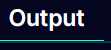
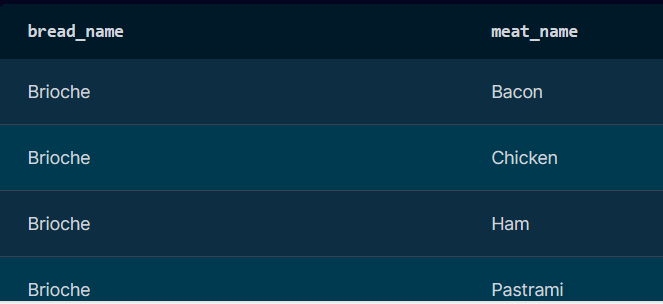

# Business Case: Electric Bike Replacement

**Electric Bike Replacement**

After about 10,000 miles, Electric bike batteries begin to degrade and need to be replaced.

Write a query to determine the amount of bikes that currently need to be replaced.

In [ ]:
SELECT COUNT(*)
FROM bikes
WHERE miles >= 10000;

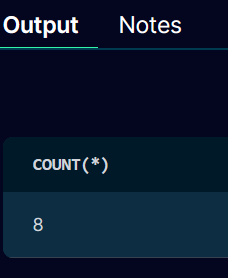

# Business Case: Car Failure

**Car Failure**

Cars need to be inspected every year in order to pass inspection and be street legal. If a car has any critical issues it will fail inspection or if it has more than 3 minor issues it will also fail.

Write a query to identify all of the cars that passed inspection.

Output should include the owner name and vehicle name. Order by the owner name alphabetically.

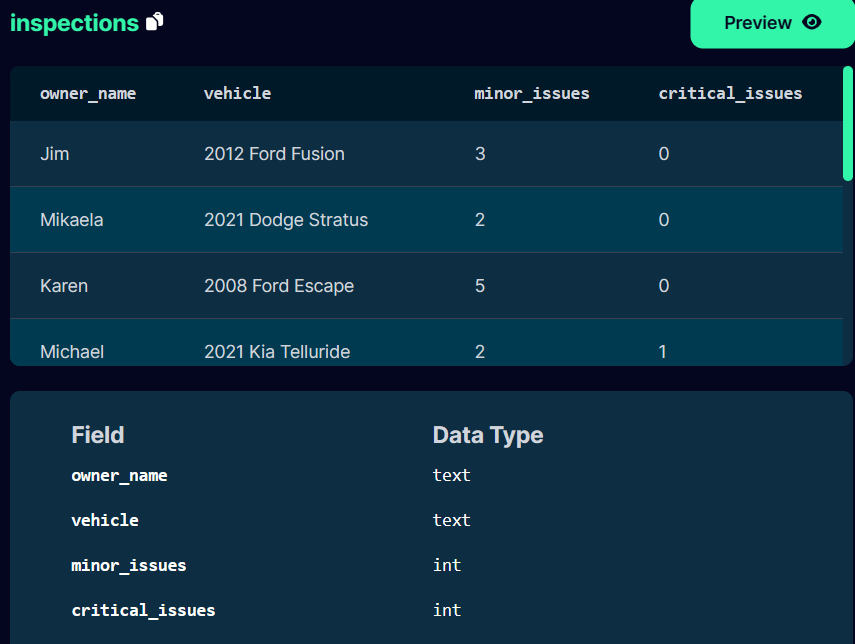

In [ ]:
SELECT owner_name, vehicle
FROM inspections
WHERE critical_issues = 0 AND minor_issues <= 3
ORDER BY owner_name;

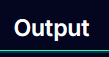
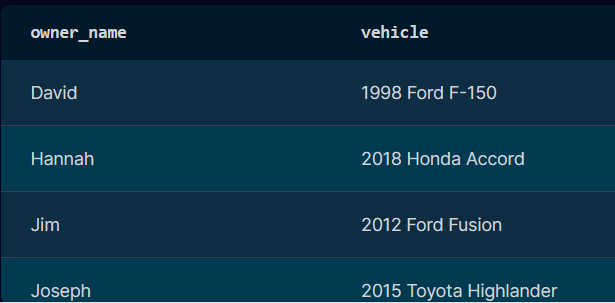

# Business Case: Perfect Data Analyst

**Perfect Data Analyst**

Return all the candidate IDs that have problem solving skills, SQL experience, knows Python or R, and has domain knowledge.

Order output on IDs from smallest to largest.

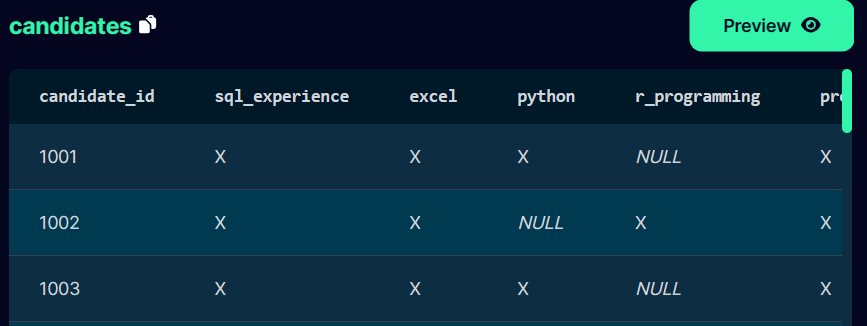
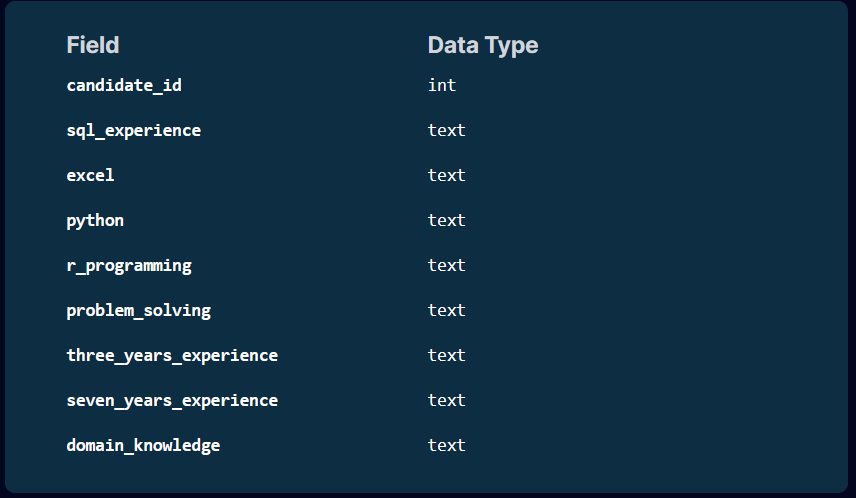


In [ ]:
SELECT candidate_id 
FROM candidates 
WHERE problem_solving = 'X'
  AND sql_experience = 'X'
  AND (python = 'X' OR r_programming = 'X')
  AND domain_knowledge = 'X'
ORDER BY candidate_id ASC;

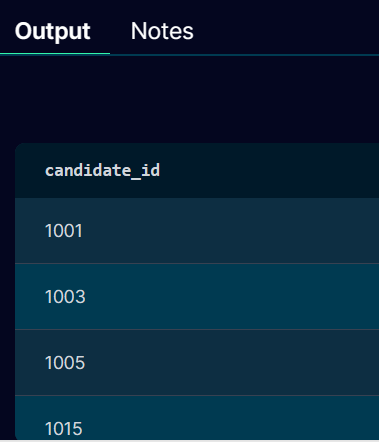

# Business Case: Costco Rotisserie Loss

**Costco Rotisserie Loss**

Costco is known for their rotisserie chickens they sell, not just because they are delicious, but because they are a loss leader in this area.

This means they actually lose money in selling the chickens, but they are okay with this because they make up for that in other areas.

Using the sales table, calculate how much money they have lost on their rotisserie chickens this year. Round to the nearest whole number.

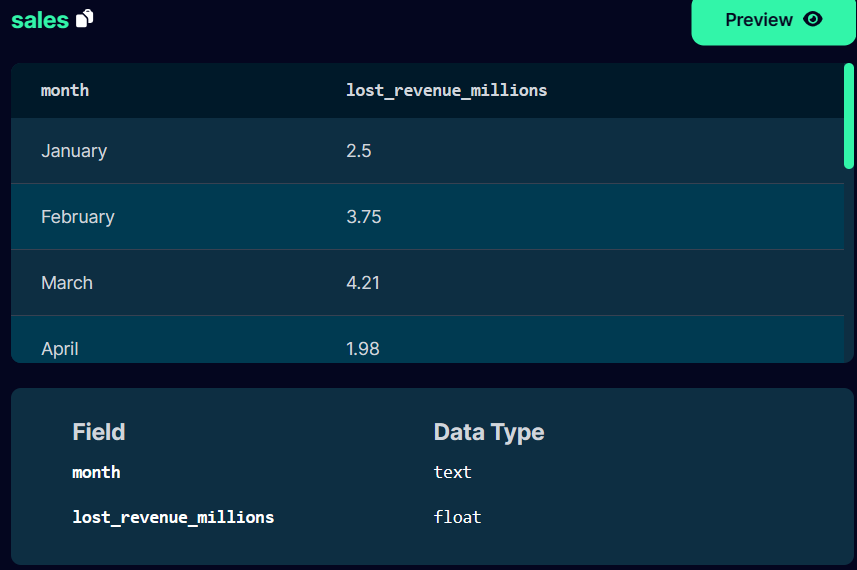

In [ ]:
SELECT ROUND(SUM(lost_revenue_millions),0) AS loss_revenue
FROM sales;

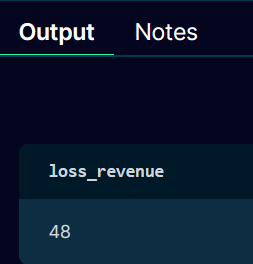

# Business Case: Media Addicts

**Media Addicts**

Social Media Addiction can be a crippling disease affecting millions every year.

We need to identify people who may fall into that category.

Write a query to find the people who spent a higher than average amount of time on social media.

Provide just their first names alphabetically so we can reach out to them individually.

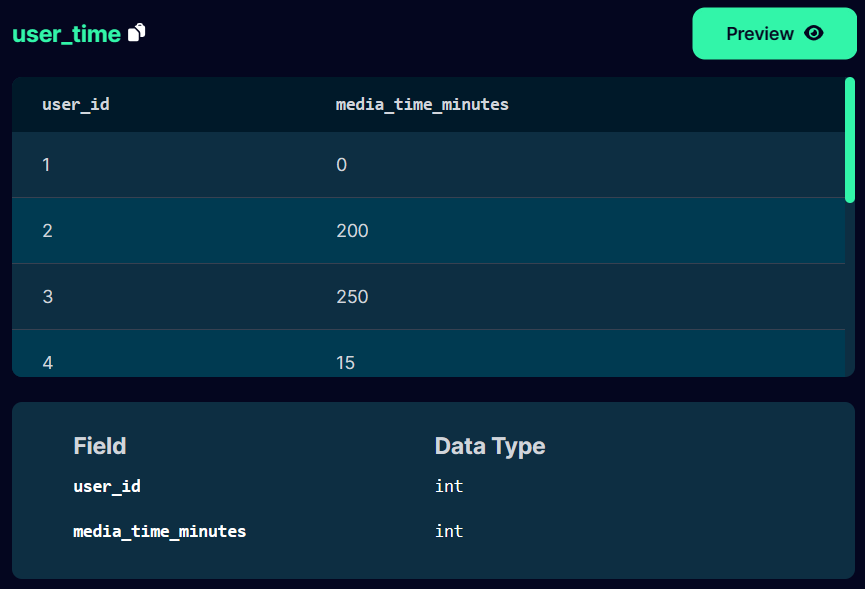
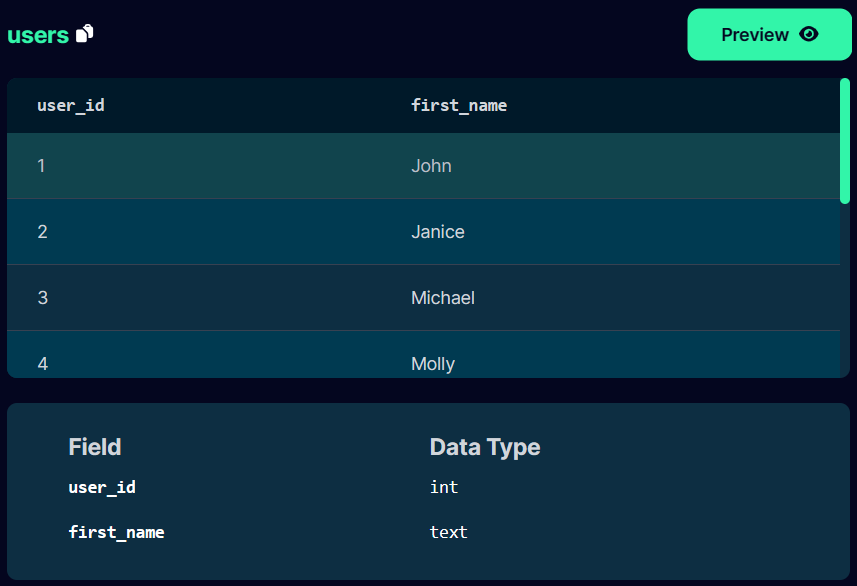

In [ ]:
SELECT first_name
FROM users
JOIN user_time
  ON users.user_id = user_time.user_id
WHERE media_time_minutes > 
(SELECT AVG(media_time_minutes)
FROM user_time )
ORDER BY first_name;

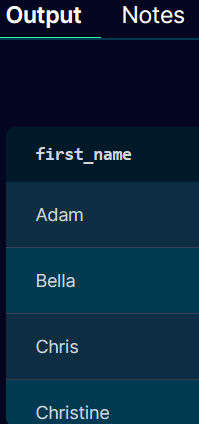

# Business Case: TMI (Too Much Information)

**TMI (Too Much Information)**

Often when you're working with customer information you'll want to sell that data to a third party. Sometimes it is illegal to give away sensitive information such as a full name.

Here you are given a table that contains a customer ID and their full name.

Return the customer ID with only the first name of each customer.

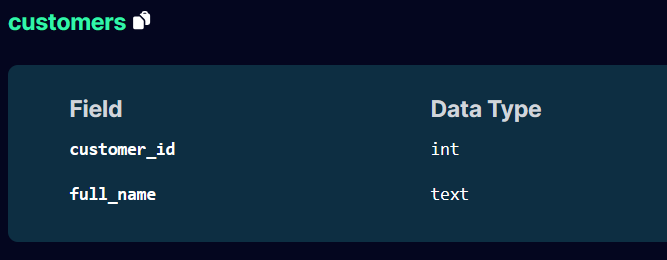

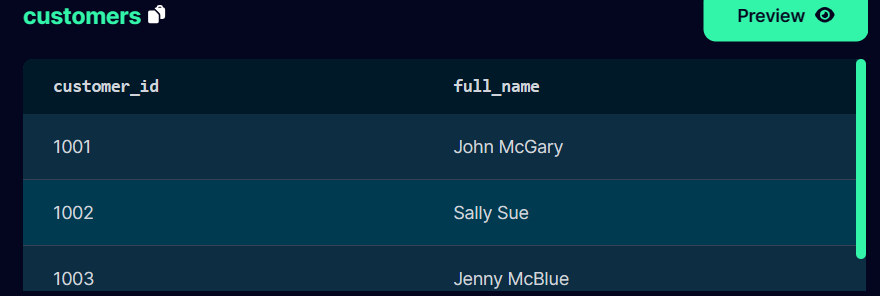

In [ ]:
-- The customers table provide the customer_id and full_name. I will use a substring to seperate the first name from the last name to protect the customer's sensitive information.

SELECT customer_id,
  SUBSTRING_INDEX(full_name, ' ', 1) AS first_name
FROM customers;

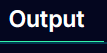
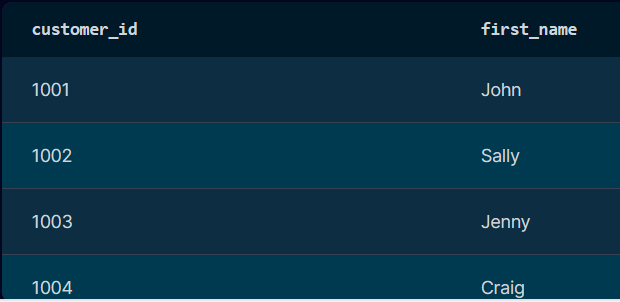

**Learned how to use substring_index to separate first and last name from a column that combined a customer's full name**

# Business Case: Separation

**Separation**

Data was input incorrectly into the database. The ID was combined with the First Name.

Write a query to separate the ID and First Name into two separate columns.

Each ID is 5 characters long.

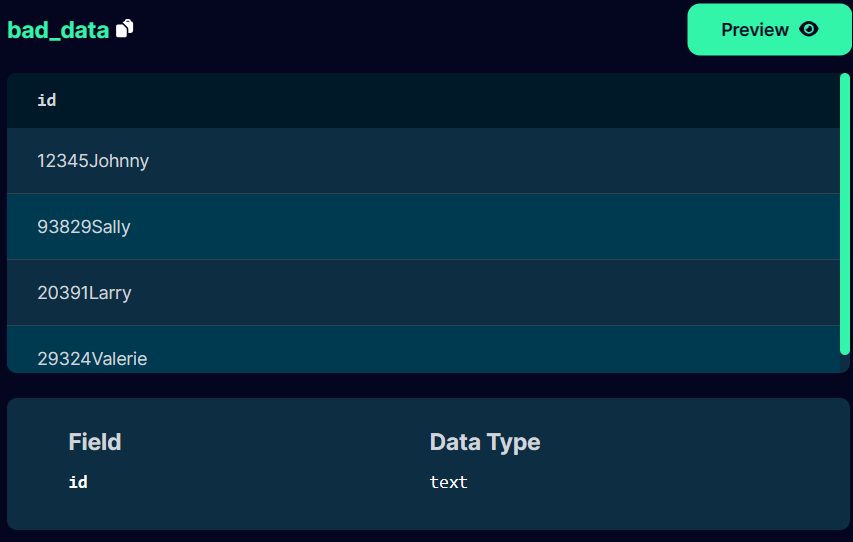

In [ ]:
SELECT LEFT(id,5) AS new_id, substring(id, 6) AS full_name 
FROM bad_data;

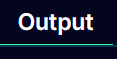
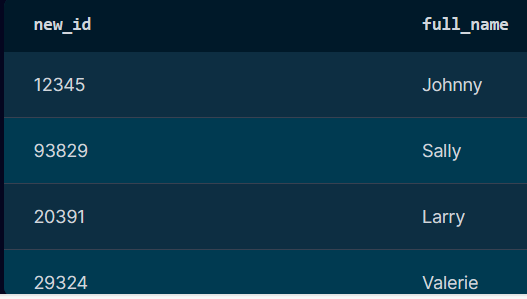


# Business Case: Company Wide Increase

**Company Wide Increase**

If our company hits its yearly targets, every employee receives a salary increase depending on what level you are in the company.

Give each Employee who is a level 1 a 10% increase, level 2 a 15% increase, and level 3 a 200% increase.

Include this new column in your output as "new_salary" along with your other columns.

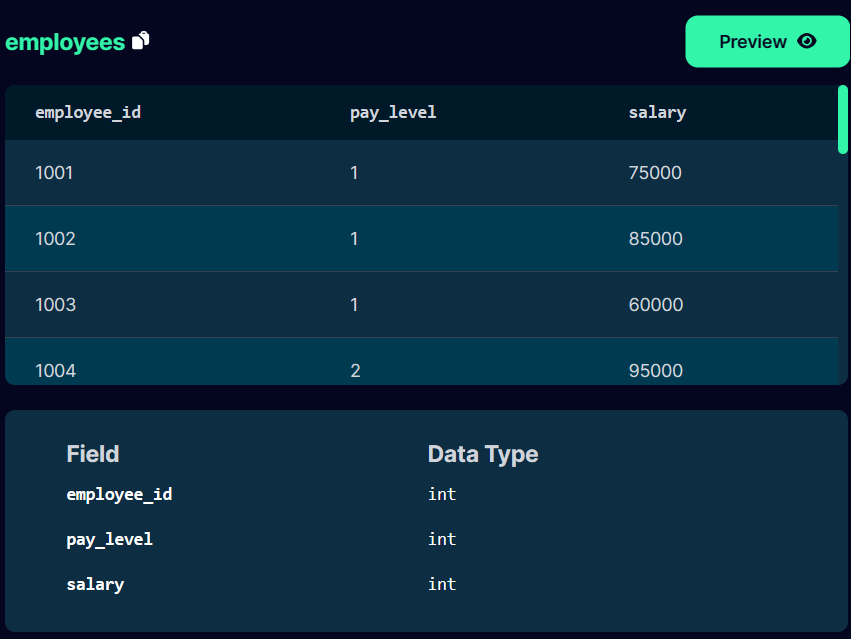

In [ ]:
SELECT *, 
CASE
  WHEN pay_level =  1 THEN salary * 1.10
  WHEN pay_level =  2 THEN salary * 1.15
  WHEN pay_level =  3 THEN salary * 3
END AS new_salary
FROM employees;

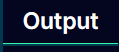
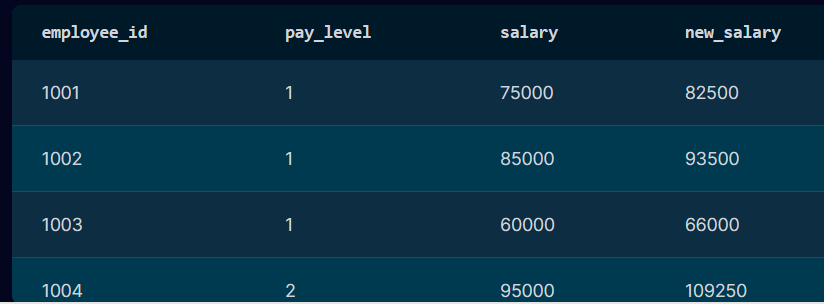


# Business Case: Direct Reports

**Direct Reports**

Write a query to determine how many direct reports each Manager has.

Note: Managers will have "Manager" in their title.

Report the Manager ID, Manager Title, and the number of direct reports in your output.


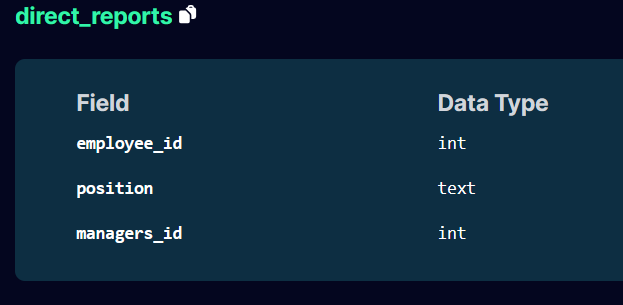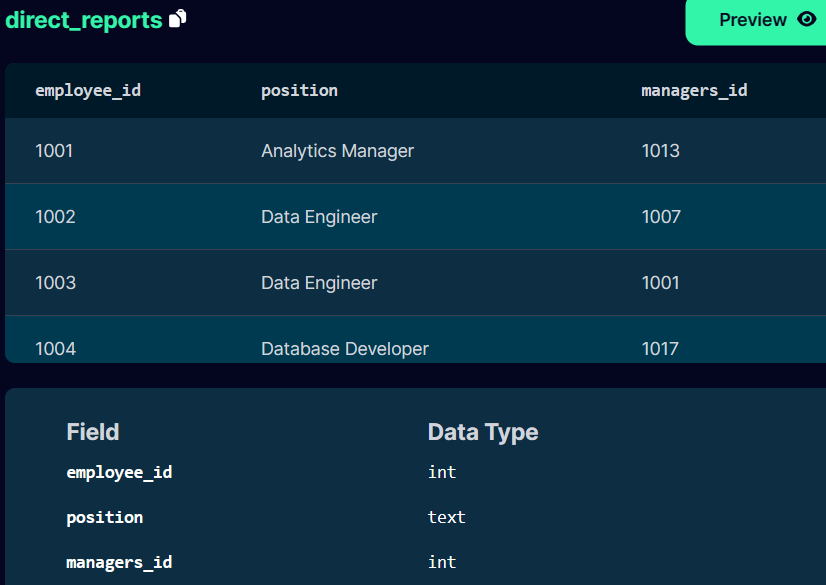

In [ ]:
-- Wrote a query using a self join to find the number of employees reporting an employee with a manager title.
SELECT dr2.employee_id as manager_id, dr2.position as manager_title,
  COUNT(dr1.employee_id) as direct_reports
FROM direct_reports dr1
  JOIN direct_reports dr2
  ON dr1.managers_id = dr2.employee_id
WHERE dr2.position LIKE '%Manager%'
GROUP BY manager_id, manager_title;

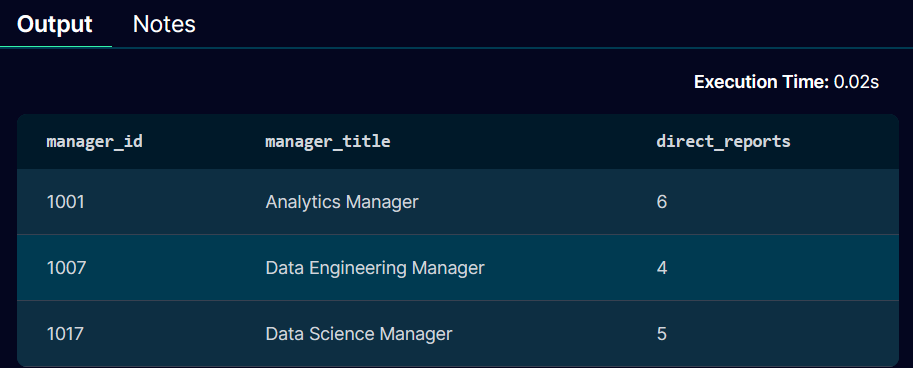

**Learned how write a query using a self join**

# Business Case: Bike Price

**Bike Price**

Sarah's Bike Shop sells a lot of bikes and wants to know what the average sale price is of her bikes.

She sometimes gives away a bike for free for a charity event and if she does she leaves the price of the bike as blank, but marks it sold.

Write a query to show her the average sale price of bikes for only bikes that were sold, and not donated.

Round answer to 2 decimal places.

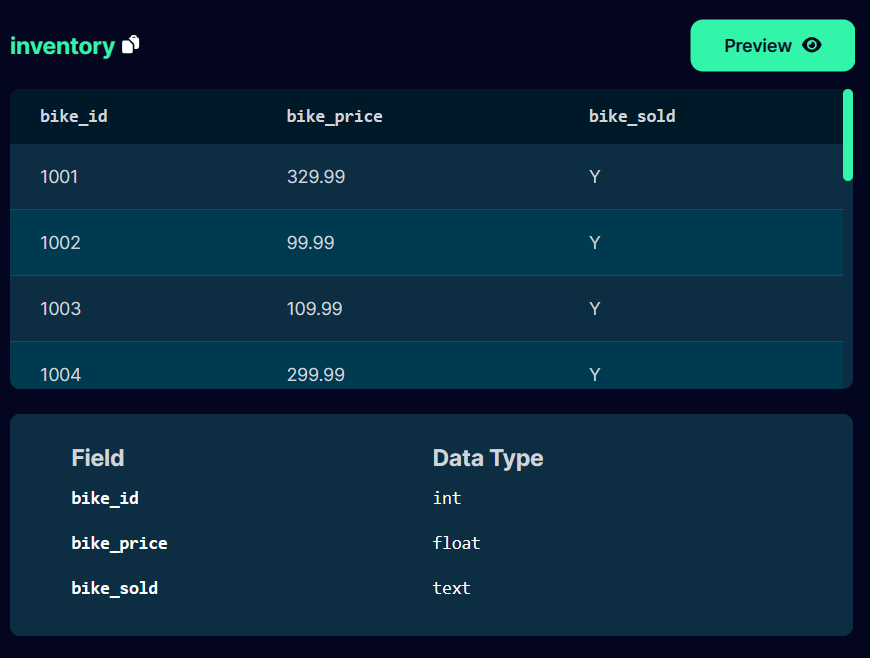

In [ ]:
-- Wrote a query the round the answer to 2 decimal places
SELECT  ROUND(AVG(bike_price),2) AS avg_sale_price
  FROM inventory 
Where bike_sold = 'Y' AND bike_price IS NOT NULL;

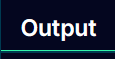
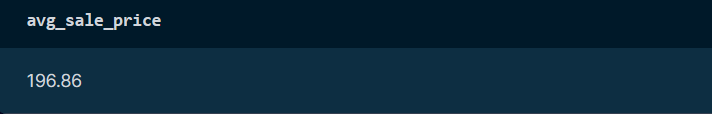

# Business Case: Senior Citizen Discount

**Senior Citizen Discount**

If a customer is 55 or above they qualify for the senior citizen discount. Check which customers qualify.

Assume the current date 1/1/2023.

Return all of the Customer IDs who qualify for the senior citizen discount in ascending order.

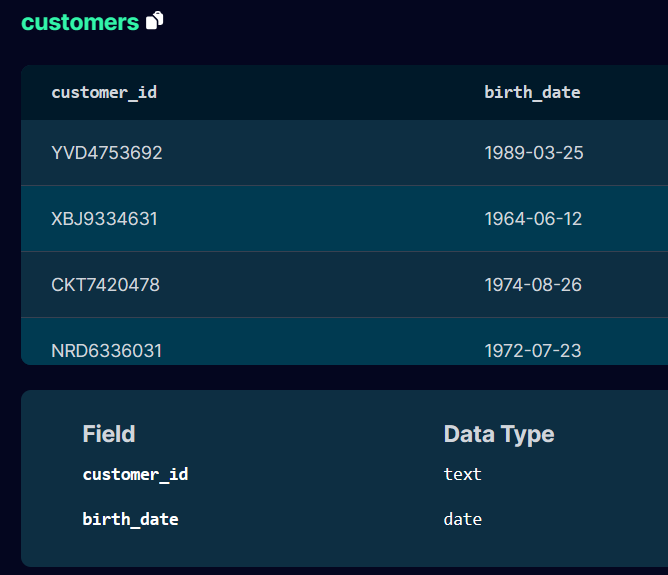

In [ ]:
-- Wrote a query using TimeStampDiff to calculate customer_id with age of 55 or older based on their birthdate
SELECT customer_id 
FROM customers 
WHERE TIMESTAMPDIFF(YEAR, birth_date, '2023-01-01') >= 55
ORDER BY customer_id asc;

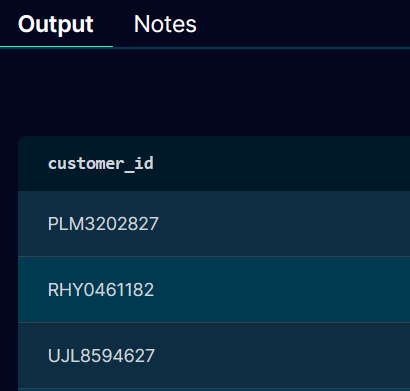

**Learned TIMESTAMPDIFF and how to use it to calculate a customer's age based on their birthdate and filter customers 55 or older.**

# Business Case:  Kroger's Members

**Kroger's Members**

Kroger's is a very popular grocery chain in the US. They offer a membership card in exchange for a discount on select items. Customers can still shop at Krogers without the card.

Write a query to find the percentage of customers who shop at Kroger's who also have a Kroger's membership card. Round to 2 decimal places.

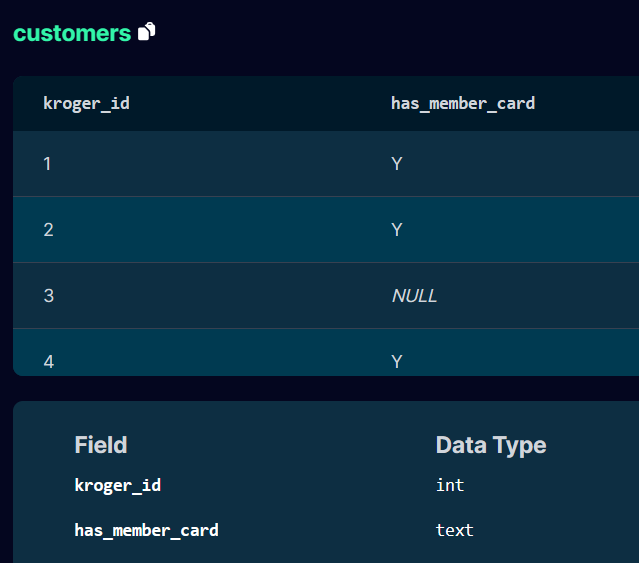

In [ ]:
-- used a CASE expression to find the number of customers who have a Kroger's membership card.
SELECT ROUND(SUM(CASE WHEN has_member_card = 'Y' THEN 1 END) 
  / COUNT(kroger_id) * 100, 2) AS percentage
FROM customers;

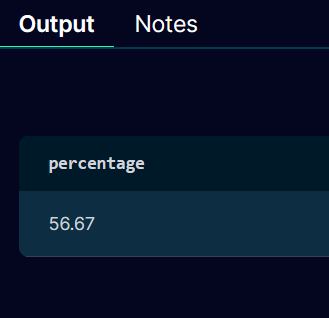

# Business Case: Food Divides Us

**Food Divides Us**

In the United States, fast food is the cornerstone of it's very society. Without it, it would cease to exist.

But which region spends the most money on fast food?

Write a query to determine which region spends the most amount of money on fast food.

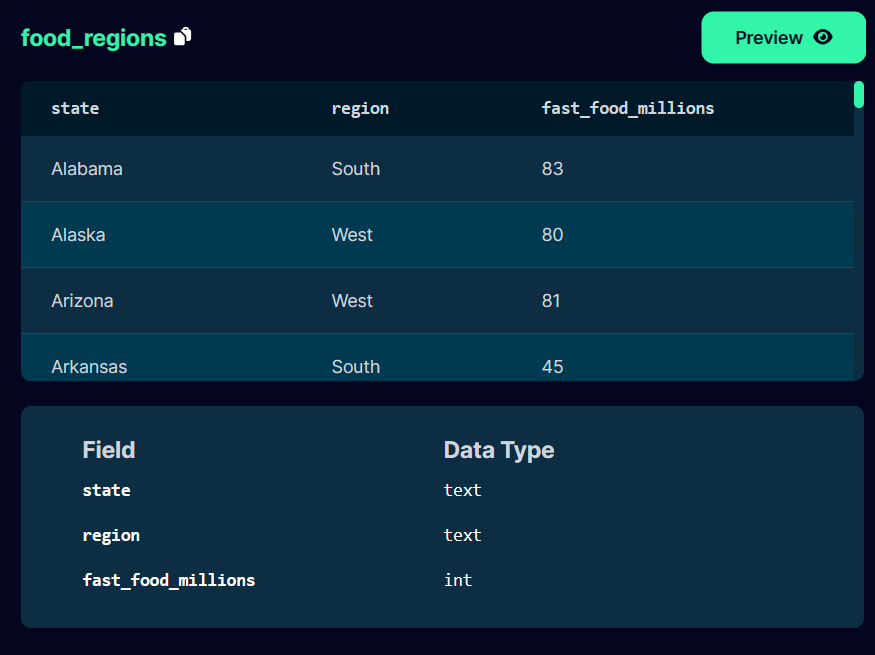

In [ ]:
-- solved the problem using a CTE
WITH food_regions_grouped AS (
SELECT region, SUM(fast_food_millions) AS total_spending
FROM food_regions 
GROUP BY region
ORDER BY total_spending DESC
LIMIT 1)
SELECT region 
  FROM food_regions_grouped;

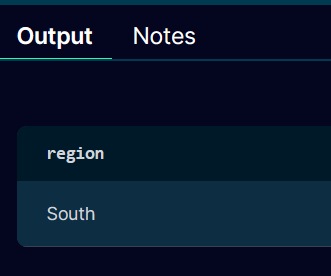

# Business Case: Tech Layoffs 

**Tech Layoffs**

Tech companies have been laying off employees after a large surge of hires in the past few years.

Write a query to determine the percentage of employees that were laid off from each company.

Output should include the company and the percentage (to 2 decimal places) of laid off employees.

Order by company name alphabetically.

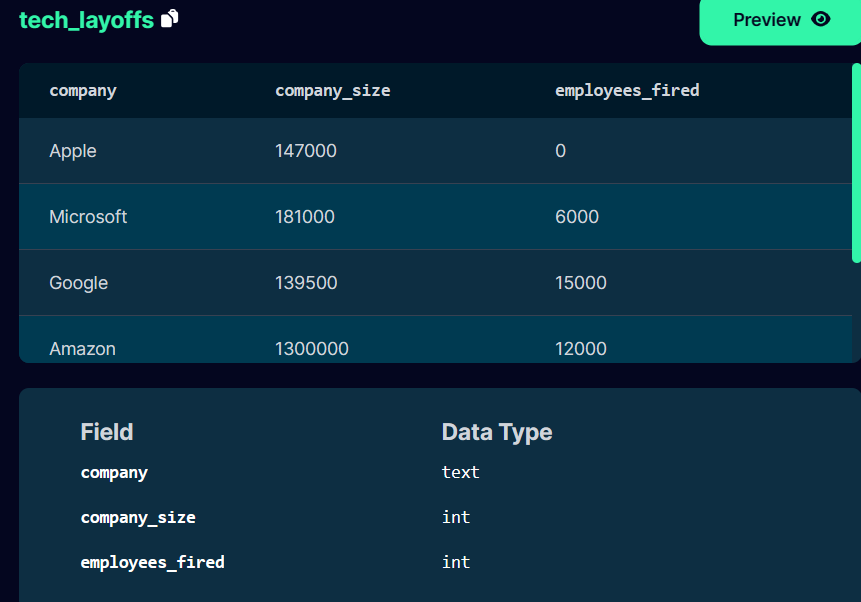

In [ ]:
-- Calculated the percentage of employees laid off by dividing employees_fired and company size
SELECT company, ROUND(employees_fired / company_size * 100, 2) AS percentage
FROM tech_layoffs 
ORDER BY company asc;

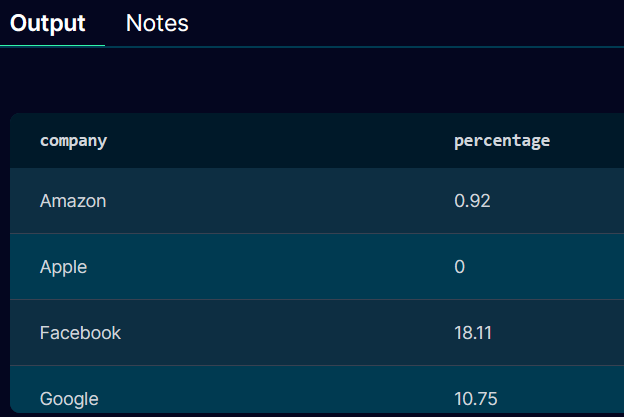

# Business Case: LinkedIn Famous

**LinkedIn Famous**

Write a query to determine the popularity of a post on LinkedIn

Popularity is defined by number of actions (likes, comments, shares, etc.) divided by the number impressions the post received * 100.

If the post receives a score higher than 1 it was very popular.

Return all the post IDs and their popularity where the score is 1 or greater.

Order popularity from highest to lowest.

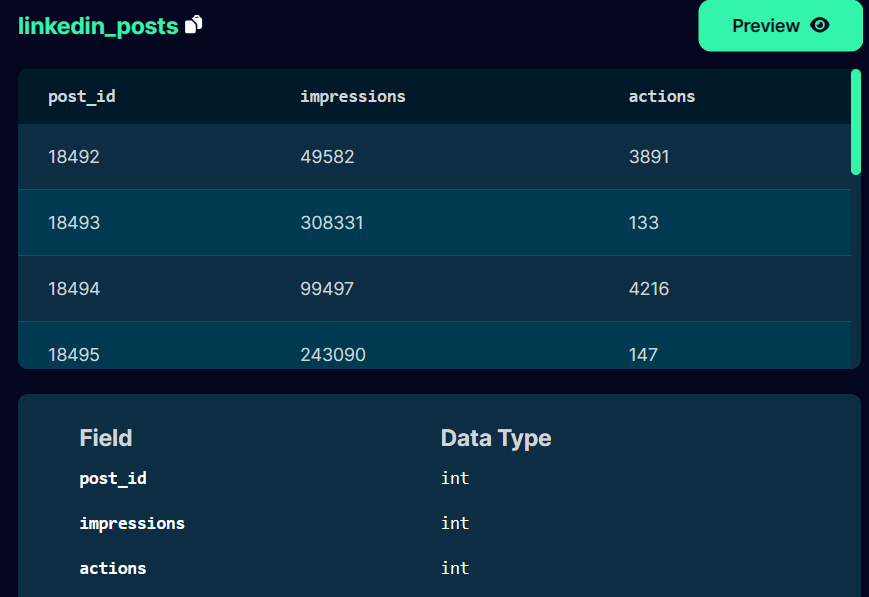

In [ ]:
SELECT post_id, 
  actions / impressions * 100 as popularity
FROM linkedin_posts 
WHERE (actions / impressions * 100) >= 1
ORDER BY popularity DESC;

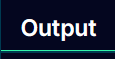
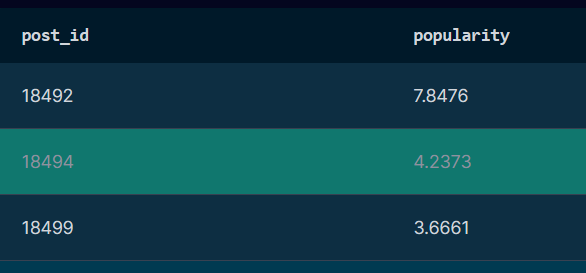

# Business Case: Cake vs Pie

**Cake vs Pie**

Marcie's Bakery is having a contest at her store. Whichever dessert sells more each day will be on discount tomorrow. She needs to identify which dessert is selling more.

Write a query to report the difference between the number of Cakes and Pies sold each day.

Output should include the date sold, the difference between cakes and pies, and which one sold more (cake or pie). The difference should be a positive number.

Return the result table ordered by Date_Sold.

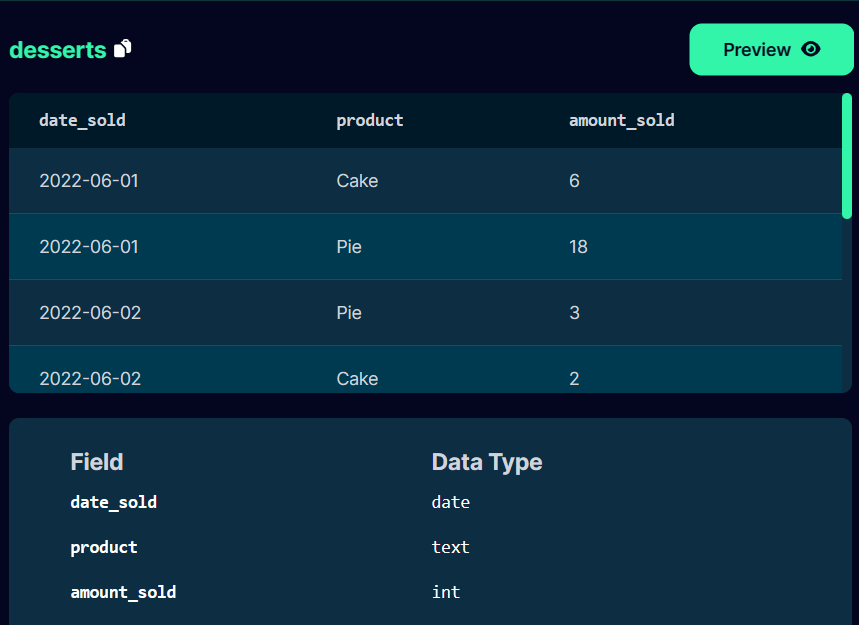

In [ ]:
- Used ABS to returne a positive number when calculating the difference of cake vs. pies
SELECT date_sold, 
ABS(SUM(CASE WHEN product = 'Cake' THEN amount_sold ELSE 0 END) -
  SUM(CASE WHEN product = 'Pie' THEN amount_sold ELSE 0 END)) AS difference,
CASE
  WHEN SUM(CASE WHEN product = 'Cake' THEN amount_sold ELSE 0 END) >
  SUM(CASE WHEN product = 'Pie' THEN amount_sold ELSE 0 END)
  THEN 'Cake'
  WHEN SUM(CASE WHEN product = 'Cake' THEN amount_sold ELSE 0 END) = 
  SUM(CASE WHEN product = 'Pie' THEN amount_sold ELSE 0 END)
  THEN NULL
  ELSE 'Pie'
END AS sold_more
FROM desserts
GROUP BY date_sold
ORDER BY date_sold;

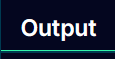
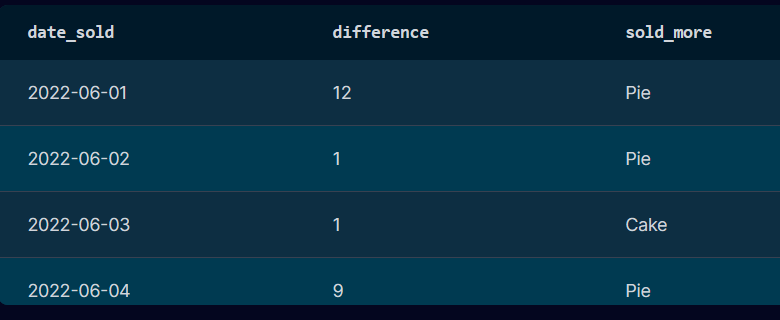

# Business Case: Temperature Fluctuations

**Temperature Fluctuations**

Write a query to find all dates with higher temperatures compared to the previous dates (yesterday).

Order dates in ascending order.

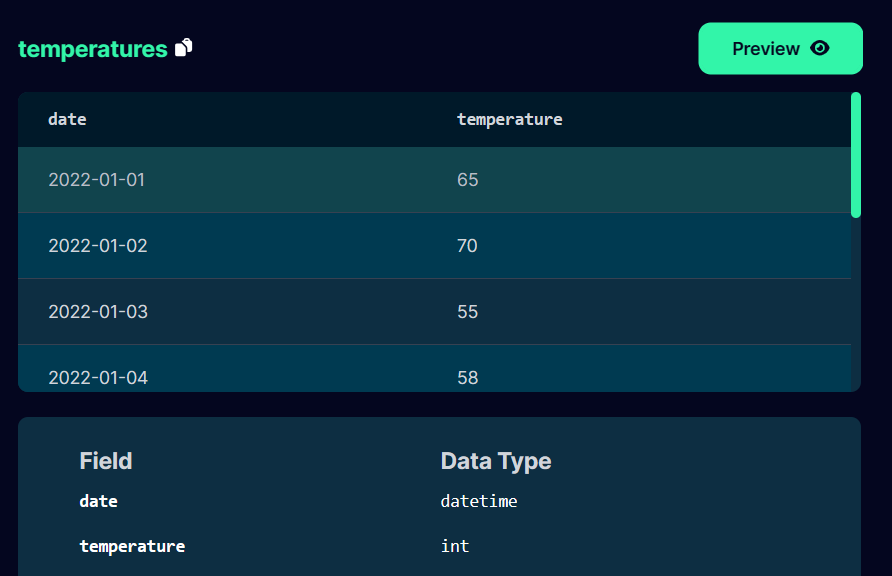

In [ ]:
--Used a self join to find the difference in temperature compared to the previous date
SELECT t1.date
  FROM temperatures t1
  JOIN temperatures t2
ON DATEDIFF(t1.date, t2.date) = 1 AND t1.temperature > t2.temperature
ORDER BY t1.date ASC;

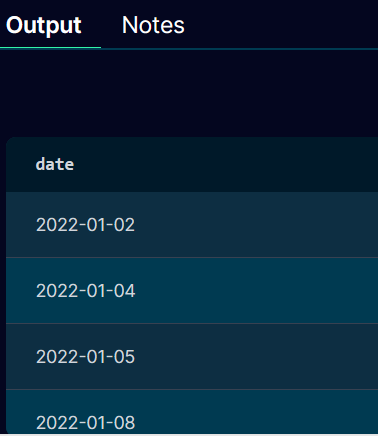

# Business Case: Kelly's 3rd Purchase

**Kelly's 3rd Purchase**

At Kelly's Ice Cream Shop, Kelly gives a 33% discount on each customer's 3rd purchase.

Write a query to select the 3rd transaction for each customer that received that discount. Output the customer id, transaction id, amount, and the amount after the discount as "discounted_amount".

Order output on customer ID in ascending order.

Note: Transaction IDs occur sequentially. The lowest transaction ID is the earliest ID.

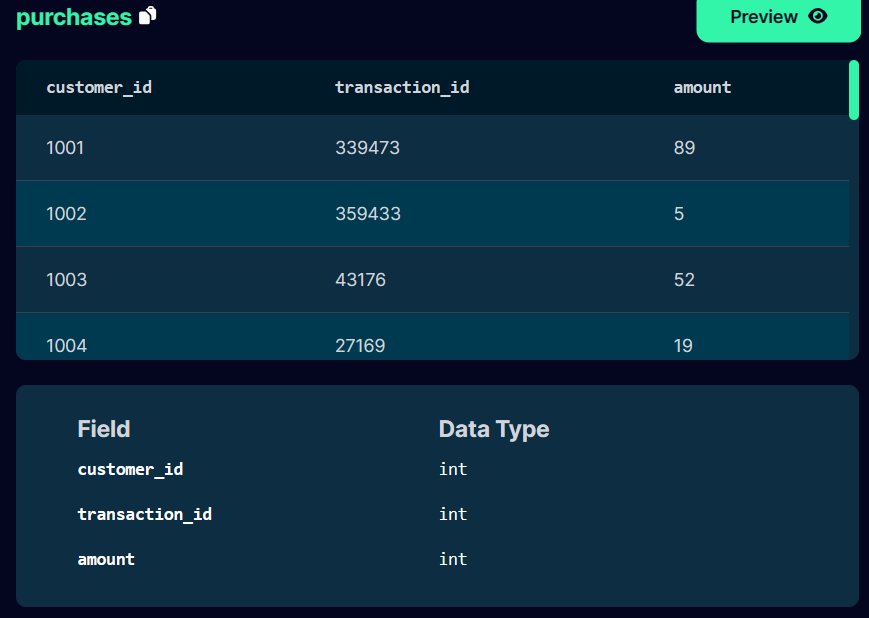

In [ ]:
-- Used partition by and a CTE to perform the query
WITH ranks as (
SELECT *,
  ROW_NUMBER() OVER(PARTITION BY customer_id ORDER BY transaction_id ASC) AS rn 
FROM purchases 
)
SELECT customer_id, transaction_id, amount, 
  amount * 0.67 AS discounted_amount
  FROM ranks
  WHERE rn = 3;

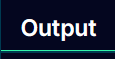
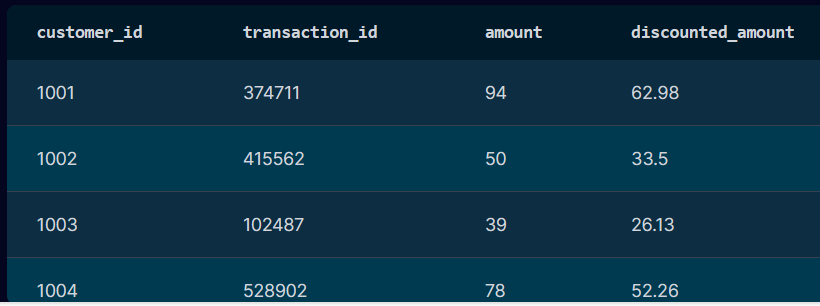